# Multiple Linear Regression
## Housing Case Study

#### Problem Statement:

This assignment is a programming assignment wherein you have to build a multiple linear regression model for the prediction of demand for shared bikes. this study will help company to make business strategy post corona

Essentially, the company wants —
- To identify the variables affecting demands e.g. workingdays, weekdays, temperature etc

- To create a linear model that quantitatively relates demand against the independent variables like workingdays, weekdays, temperature etc

- To know the accuracy of the model, i.e. how well these variables can predict demand of the rental vehicle post corona.

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the day dataset

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
rental = pd.read_csv("day.csv")

In [4]:
# Check the head of the dataset
rental.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect the various aspects of the rental dataframe

In [5]:
rental.shape

(730, 16)

In [6]:
rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
#Since there are no null or missing values no need to delete any rows or columns

In [8]:
rental.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

In [9]:
#Dropping them because this values are cummulated with the cnt target variable
rental.drop(['casual','registered'], axis = 1, inplace = True)

# Dropping these variables since these are redundant for the analysis
rental.drop(['instant','dteday'], axis = 1, inplace = True)

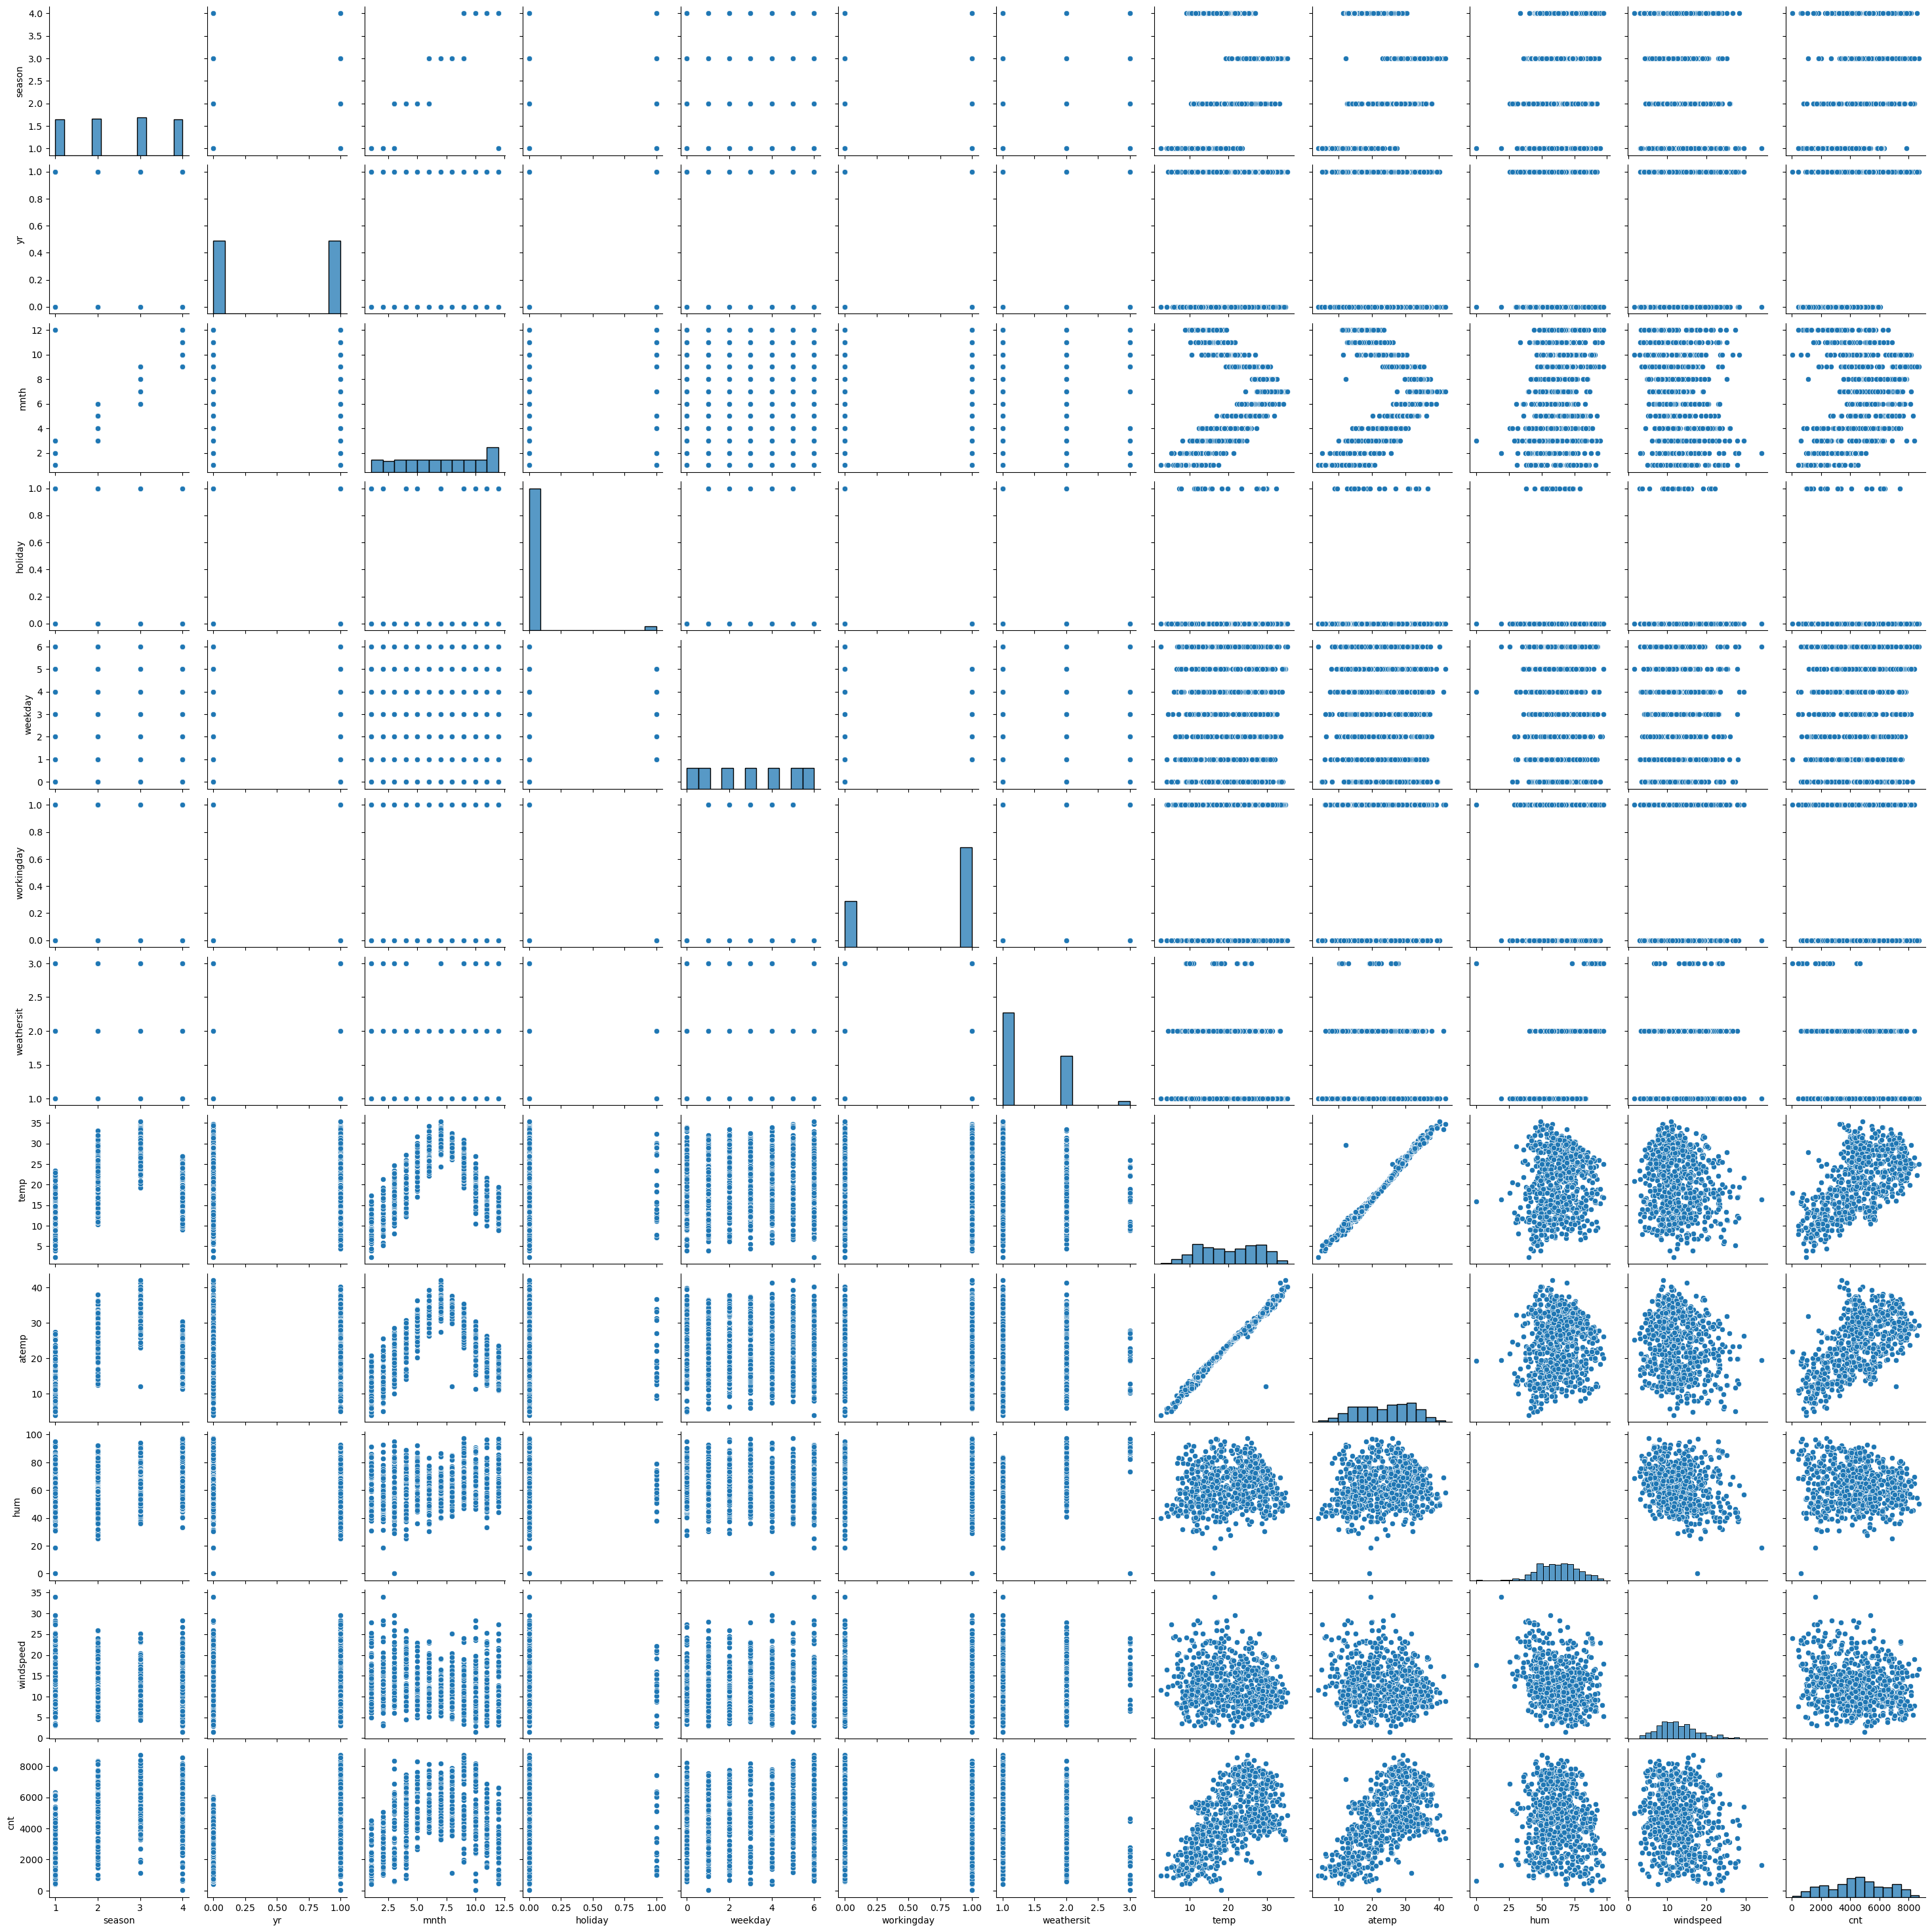

In [10]:
sns.pairplot(rental)
plt.show()

In [11]:
# Dropping temp since this is closely related to atemp
rental.drop(['temp'], axis = 1, inplace = True)

#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

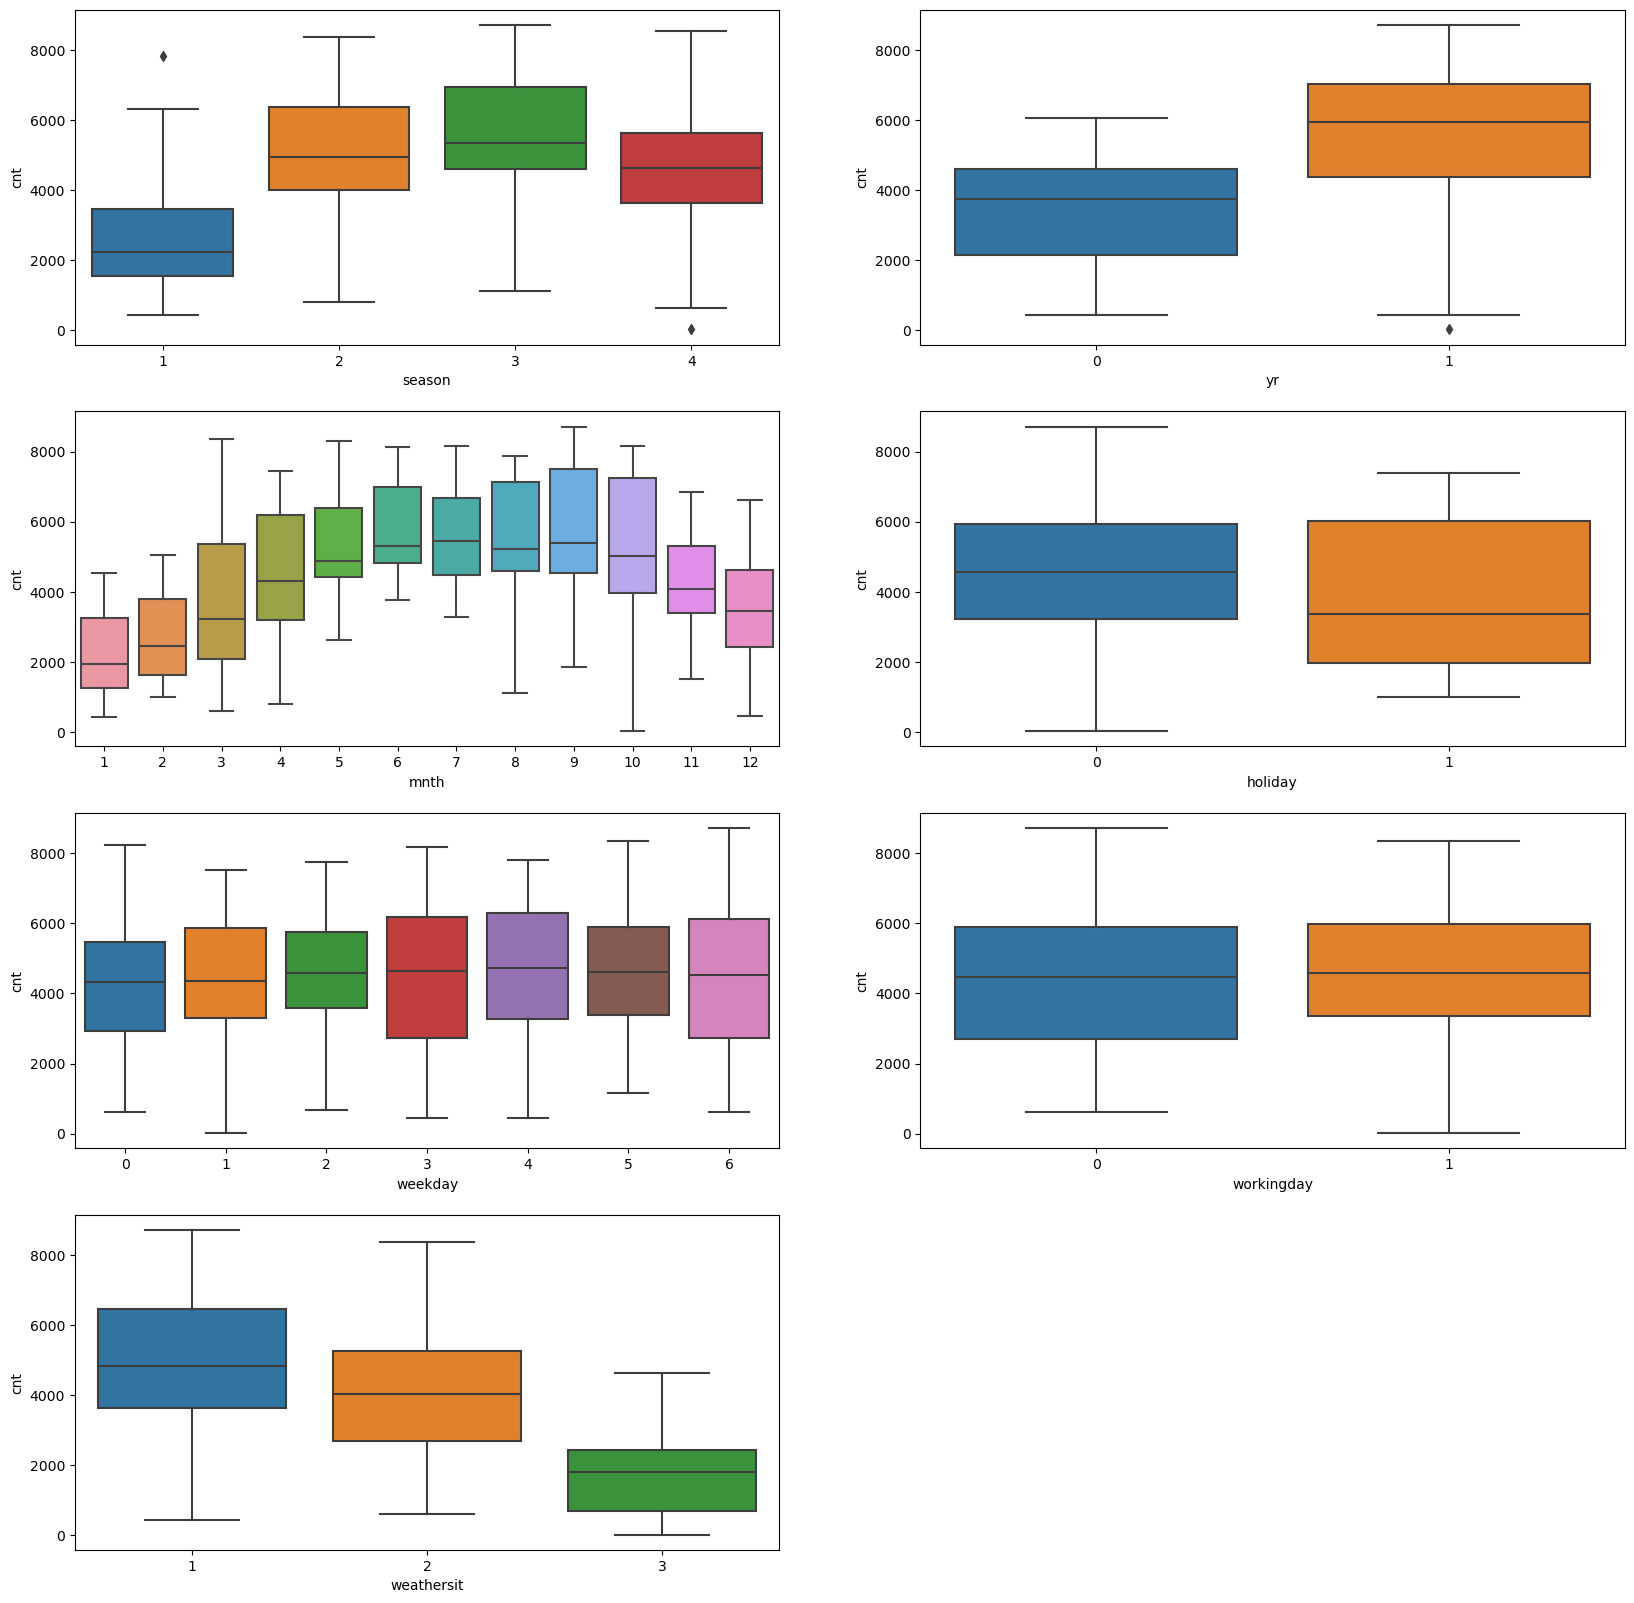

In [12]:
plt.figure(figsize=(20, 20))
plt.subplot(4,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = rental)
plt.subplot(4,2,2)
sns.boxplot(x = 'yr', y = 'cnt', data = rental)
plt.subplot(4,2,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = rental)
plt.subplot(4,2,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = rental)
plt.subplot(4,2,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = rental)
plt.subplot(4,2,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = rental)
plt.subplot(4,2,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = rental)
plt.show()

In [13]:
# From the above graph we can see some key observation can be made
# 1. Season:  Sping has least booking compared to summer, fall and winter
# 2. yr: 2019 has better booking than 2018, we can see company was gaining the popularity.
# 3. Holiday: If holiday then the bookings are less
# 4. weatherlist : If the weather is mild and good then the bookings are more. In extreme weather(4) we see zero booking.
# 5. temp and atemp has some linear relationship with count.


## Step 3: Data Preparation

### Dummy Variables

The variables `season` `weathersit` have more than three levels. We need to convert these levels into integer. 
For this, we will use something called `dummy variables`. 
I am not going for the `mnth` since this is again explained by `season`

Now, you don't need four columns. You can drop the `first` column, as this column can be identified using the remaining three columns— 
- `000` will correspond to `spring` in `season` and `clear weather` in `weatherlist`
- `001` will correspond to `summer` in `season` and `mist weather` in `weatherlist`
- `010` will correspond to `fall` in `season` and `light harsh weather` in `weatherlist`
- `100` will correspond to `winter` in `season` and `harsh weather` in `weatherlist`

In [14]:
# Let's drop the first column
status = pd.get_dummies(rental['season'], drop_first = True, prefix='season')

# Add the results to the original rental dataframe
rental = pd.concat([rental, status], axis = 1)


In [15]:
status = pd.get_dummies(rental['weathersit'], drop_first = True,  prefix='weathersit')

# Add the results to the original rental dataframe
rental = pd.concat([rental, status], axis = 1)

In [16]:
# Now let's see the head of our dataframe.

rental.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,season_2,season_3,season_4,weathersit_2,weathersit_3
0,1,0,1,0,6,0,2,18.18125,80.5833,10.749882,985,False,False,False,True,False
1,1,0,1,0,0,0,2,17.68695,69.6087,16.652113,801,False,False,False,True,False
2,1,0,1,0,1,1,1,9.47025,43.7273,16.636703,1349,False,False,False,False,False
3,1,0,1,0,2,1,1,10.60610,59.0435,10.739832,1562,False,False,False,False,False
4,1,0,1,0,3,1,1,11.46350,43.6957,12.522300,1600,False,False,False,False,False


In [17]:
# Drop 'season' 'weathersit' as we have created the dummies for them

rental.drop(['season', 'weathersit'], axis = 1, inplace = True)

In [18]:
rental.head()

,yr,mnth,holiday,weekday,workingday,atemp,hum,windspeed,cnt,season_2,season_3,season_4,weathersit_2,weathersit_3
0,0,1,0,6,0,18.18125,80.5833,10.749882,985,False,False,False,True,False
1,0,1,0,0,0,17.68695,69.6087,16.652113,801,False,False,False,True,False
2,0,1,0,1,1,9.47025,43.7273,16.636703,1349,False,False,False,False,False
3,0,1,0,2,1,10.60610,59.0435,10.739832,1562,False,False,False,False,False
4,0,1,0,3,1,11.46350,43.6957,12.522300,1600,False,False,False,False,False


## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [19]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(rental, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 
1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling since it help in dealing with outlyers.

In [20]:
scaler = MinMaxScaler()


In [21]:
rental.head()

,yr,mnth,holiday,weekday,workingday,atemp,hum,windspeed,cnt,season_2,season_3,season_4,weathersit_2,weathersit_3
0,0,1,0,6,0,18.18125,80.5833,10.749882,985,False,False,False,True,False
1,0,1,0,0,0,17.68695,69.6087,16.652113,801,False,False,False,True,False
2,0,1,0,1,1,9.47025,43.7273,16.636703,1349,False,False,False,False,False
3,0,1,0,2,1,10.60610,59.0435,10.739832,1562,False,False,False,False,False
4,0,1,0,3,1,11.46350,43.6957,12.522300,1600,False,False,False,False,False


In [22]:
# Apply scaler() to all the columns except the 'Bianry'
#Note: I have fit_transformed dummy as well since further analysis in the model building where the feature adding is not possible eg: season_3
num_vars = ['mnth', 'weekday', 'atemp','hum', 'windspeed','cnt','season_2', 'season_3', 'season_4', 'weathersit_2', 'weathersit_3']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [23]:
df_train.head()

,yr,mnth,holiday,weekday,workingday,atemp,hum,windspeed,cnt,season_2,season_3,season_4,weathersit_2,weathersit_3
653,1,0.818182,0,0.333333,1,0.501133,0.575354,0.300794,0.864243,0.0,0.0,1.0,0.0,0.0
576,1,0.545455,0,0.333333,1,0.766351,0.725633,0.264686,0.827658,0.0,1.0,0.0,0.0,0.0
426,1,0.181818,0,1.000000,0,0.438975,0.640189,0.255342,0.465255,0.0,0.0,0.0,1.0,0.0
728,1,1.000000,0,0.000000,0,0.200348,0.498067,0.663106,0.204096,0.0,0.0,0.0,0.0,0.0
482,1,0.272727,0,1.000000,0,0.391735,0.504508,0.188475,0.482973,1.0,0.0,0.0,1.0,0.0


In [24]:
df_train.describe()

,yr,mnth,holiday,weekday,workingday,atemp,hum,windspeed,cnt,season_2,season_3,season_4,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000
mean,0.507843,0.504456,0.025490,0.498366,0.676471,0.512989,0.650369,0.320768,0.513620,0.245098,0.262745,0.24902,0.343137,0.029412
std,0.500429,0.315338,0.157763,0.336182,0.468282,0.212385,0.145882,0.169797,0.224593,0.430568,0.440557,0.43287,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.181818,0.000000,0.166667,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000
50%,1.000000,0.545455,0.000000,0.500000,1.000000,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000
75%,1.000000,0.818182,0.000000,0.833333,1.000000,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,0.00000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [25]:
df_train.corr()

,yr,mnth,holiday,weekday,workingday,atemp,hum,windspeed,cnt,season_2,season_3,season_4,weathersit_2,weathersit_3
yr,1.000000,-0.016067,-0.014980,-0.041769,0.031808,0.104206,-0.084792,-0.001108,0.591508,0.013856,0.044102,-0.022638,-0.015469,-0.060764
mnth,-0.016067,1.000000,0.031818,-0.000072,-0.033155,0.248012,0.227247,-0.189035,0.286217,-0.323109,0.204968,0.697762,-0.016779,0.076238
holiday,-0.014980,0.031818,1.000000,-0.097993,-0.233863,-0.070640,-0.029093,0.017569,-0.095961,-0.063232,-0.040017,0.050712,-0.038279,-0.028154
weekday,-0.041769,-0.000072,-0.097993,1.000000,-0.007524,-0.013921,-0.049729,0.023804,0.032137,-0.015325,0.027223,-0.037700,0.046557,0.023883
workingday,0.031808,-0.033155,-0.233863,-0.007524,1.000000,0.067811,0.031989,-0.043176,0.092320,0.043274,0.050976,-0.057297,0.040766,0.021159
atemp,0.104206,0.248012,-0.070640,-0.013921,0.067811,1.000000,0.169461,-0.215283,0.646475,0.135806,0.669979,-0.211118,-0.086069,-0.044266
hum,-0.084792,0.227247,-0.029093,-0.049729,0.031989,0.169461,1.000000,-0.266895,-0.059993,-0.013216,0.040371,0.171579,0.481042,0.245038
windspeed,-0.001108,-0.189035,0.017569,0.023804,-0.043176,-0.215283,-0.266895,1.000000,-0.253794,0.110089,-0.194690,-0.090649,-0.030385,0.086900
cnt,0.591508,0.286217,-0.095961,0.032137,0.092320,0.646475,-0.059993,-0.253794,1.000000,0.134343,0.371606,0.032636,-0.175530,-0.226598
season_2,0.013856,-0.323109,-0.063232,-0.015325,0.043274,0.135806,-0.013216,0.110089,0.134343,1.000000,-0.340160,-0.328116,0.039442,-0.045231


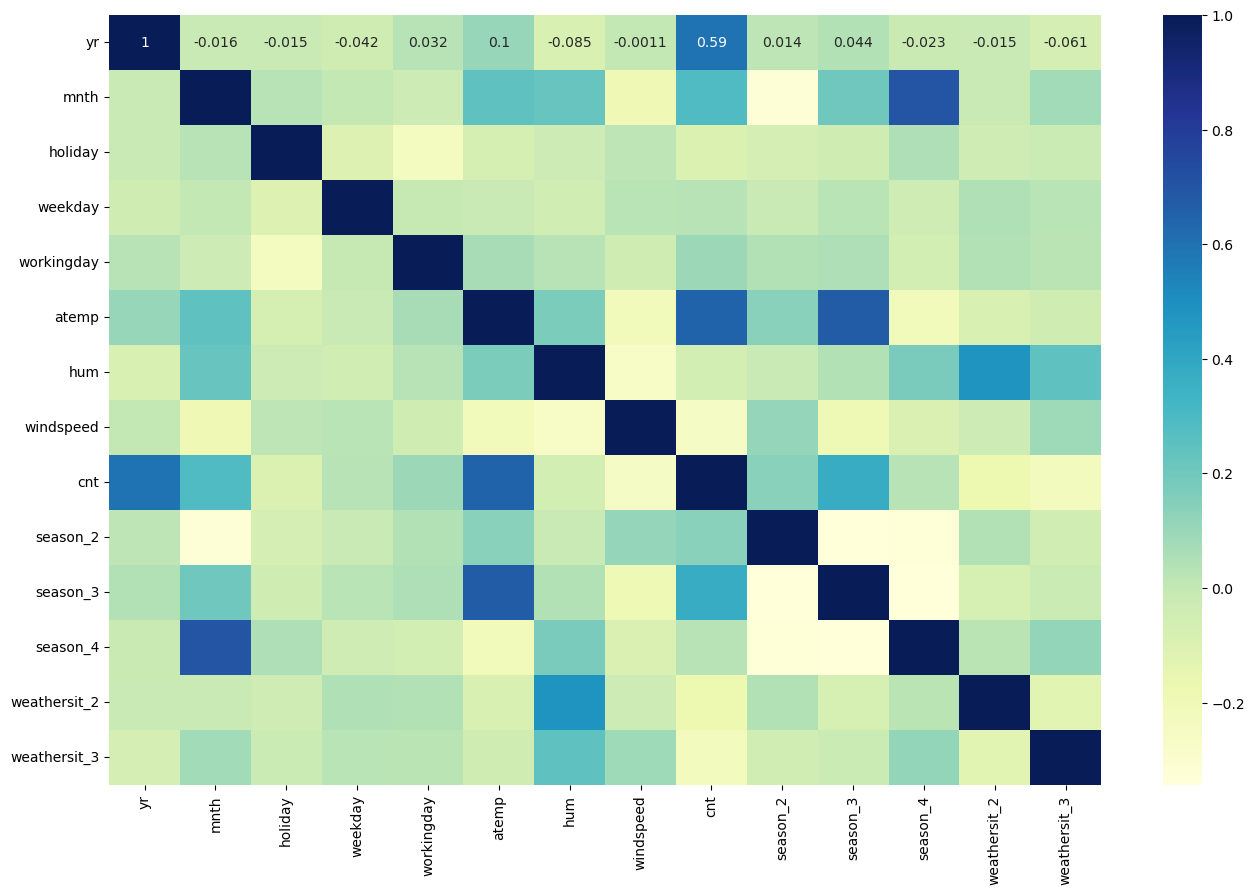

In [26]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

As you might have noticed, `atemp` seems to the correlated to `cnt` the most. Let's see a pairplot for `atemp` vs `cnt`.

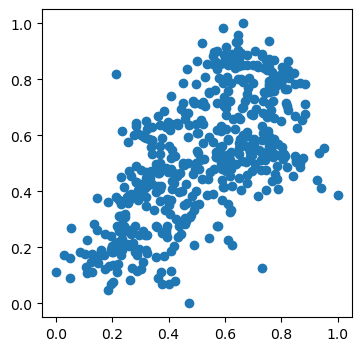

In [27]:
plt.figure(figsize=[4,4])
plt.scatter(df_train.atemp, df_train.cnt)
plt.show()

So, we pick `atemp` as the first variable and we'll try to fit a regression line to that.

### Dividing into X and Y sets for the model building

In [28]:
y_train = df_train.pop('cnt')
X_train = df_train

## Step 5: Building a linear model

Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [29]:


# Add a constant
X_train_lm = sm.add_constant(X_train[['atemp']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [30]:
# Check the parameters obtained

lr.params

const    0.162924
atemp    0.683633
dtype: float64

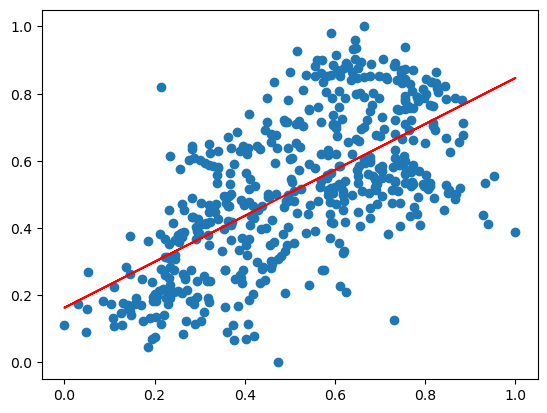

In [31]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.162924 + 0.683633*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [32]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     364.7
Date:                Tue, 30 Jul 2024   Prob (F-statistic):           1.10e-61
Time:                        18:59:29   Log-Likelihood:                 176.51
No. Observations:                 510   AIC:                            -349.0
Df Residuals:                     508   BIC:                            -340.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1629      0.020      8.199      0.0

### Adding another variable

The R-squared value obtained is `0.418`. Since we have so many variables, we can clearly do better than this. So let's go ahead and add the second most highly correlated variable, i.e. `yr`.

In [33]:
# Assign all the feature variables to X
X_train_lm = X_train[['atemp', 'yr']]

In [34]:
# Build a linear model
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const    0.072104
atemp    0.625241
yr       0.237817
dtype: float64

In [35]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     579.5
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          1.07e-131
Time:                        18:59:29   Log-Likelihood:                 341.87
No. Observations:                 510   AIC:                            -677.7
Df Residuals:                     507   BIC:                            -665.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0721      0.015      4.810      0.0

We have clearly improved the model as the value of adjusted R-squared as its value has gone up to `0.694` from `0.417`.
Let's go ahead and add another variable, `season_3`.

In [36]:
# Assign all the feature variables to X
X_train_lm = X_train[['atemp', 'yr', 'season_3']]

In [37]:
# Build a linear model


X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const       0.052524
atemp       0.687133
yr          0.236802
season_3   -0.044355
dtype: float64

In [38]:
# Print the summary of the model

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     393.3
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          8.89e-132
Time:                        18:59:29   Log-Likelihood:                 345.39
No. Observations:                 510   AIC:                            -682.8
Df Residuals:                     506   BIC:                            -665.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0525      0.017      3.158      0.0

We have improved the adjusted R-squared again. Now let's go ahead and add all the feature variables.

### Adding all the variables to the model

In [39]:
# Check all the columns of the dataframe

rental.columns

Index(['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'atemp', 'hum',
       'windspeed', 'cnt', 'season_2', 'season_3', 'season_4', 'weathersit_2',
       'weathersit_3'],
      dtype='object')

In [40]:
#Build a linear model
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const           0.167183
yr              0.233502
mnth            0.013108
holiday        -0.060839
weekday         0.050603
workingday      0.019112
atemp           0.491652
hum            -0.124115
windspeed      -0.161904
season_2        0.122380
season_3        0.089977
season_4        0.156399
weathersit_2   -0.059125
weathersit_3   -0.245036
dtype: float64

In [41]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     186.8
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          1.54e-181
Time:                        18:59:29   Log-Likelihood:                 490.98
No. Observations:                 510   AIC:                            -954.0
Df Residuals:                     496   BIC:                            -894.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1672      0.030      5.585   

Variable like `mnth` has high p values, hence we can drop that. We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information. 

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [42]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,atemp,21.60
6,hum,17.92
1,mnth,13.87
9,season_3,7.60
10,season_4,7.20
7,windspeed,3.80
8,season_2,3.46
4,workingday,3.14
3,weekday,3.03
11,weathersit_2,2.15


We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `mnth` as it has a very high p-value of `0.615`. Let's go ahead and drop this variables

In [43]:
# Dropping highly correlated variables and insignificant variables

X = X_train.drop('mnth', axis = 1)

In [44]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [45]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     202.7
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          1.20e-182
Time:                        18:59:29   Log-Likelihood:                 490.85
No. Observations:                 510   AIC:                            -955.7
Df Residuals:                     497   BIC:                            -900.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1681      0.030      5.629   

In [46]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,atemp,21.54
5,hum,17.13
8,season_3,5.93
6,windspeed,3.78
7,season_2,3.30
3,workingday,3.14
2,weekday,3.01
9,season_4,2.49
10,weathersit_2,2.13
0,yr,2.03


### Dropping the Variable and Updating the Model

As you can notice some of the variable have high VIF values as well as high p-values. Such variables are insignificant and should be dropped.

As you might have noticed, the variable `atemp` has a significantly high VIF (`21.54`). Hence, this variable isn't of much use and should be dropped.

In [47]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('atemp', axis = 1)

In [48]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [49]:
# Print the summary of the model

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     146.0
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          5.31e-148
Time:                        18:59:29   Log-Likelihood:                 405.98
No. Observations:                 510   AIC:                            -788.0
Df Residuals:                     498   BIC:                            -737.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2373      0.035      6.828   

In [50]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,11.64
5,windspeed,3.76
3,workingday,3.13
2,weekday,3.00
7,season_3,2.23
8,season_4,2.18
6,season_2,2.04
0,yr,1.98
9,weathersit_2,1.96
10,weathersit_3,1.13


### Dropping the variable and updating the model

Still we can some variable with high VIF value `hum`, hence we can drop this as well.

In [51]:
X = X.drop('hum', axis = 1)

In [52]:
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [53]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     160.9
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          4.20e-149
Time:                        18:59:29   Log-Likelihood:                 405.95
No. Observations:                 510   AIC:                            -789.9
Df Residuals:                     499   BIC:                            -743.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2443      0.019     12.582   

In [54]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,windspeed,3.28
3,workingday,2.79
2,weekday,2.76
0,yr,1.93
5,season_2,1.74
6,season_3,1.71
7,season_4,1.64
8,weathersit_2,1.51
9,weathersit_3,1.08
1,holiday,1.06


Still we can see variable `workingday` which has high p value i.e 0.053 which is greater than 0.05 value, hence we can drop this as well.

In [55]:
X = X.drop('workingday', axis = 1)
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     177.4
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          1.98e-149
Time:                        18:59:30   Log-Likelihood:                 404.04
No. Observations:                 510   AIC:                            -788.1
Df Residuals:                     500   BIC:                            -745.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2591      0.018     14.480   

In [56]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,3.07
2,weekday,2.70
0,yr,1.89
4,season_2,1.66
5,season_3,1.58
6,season_4,1.58
7,weathersit_2,1.49
8,weathersit_3,1.08
1,holiday,1.03


Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using 
this model only.

## Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [57]:
y_train_price = lr_4.predict(X_train_lm)

Text(0.5, 0, 'Errors')

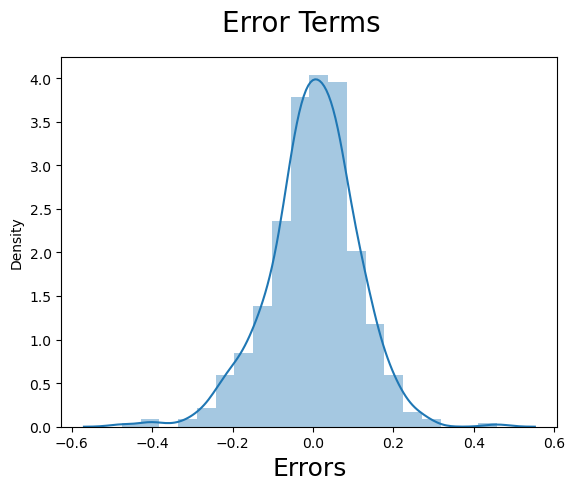

In [58]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

#### Applying the scaling on the test sets

In [59]:
num_vars = ['mnth', 'weekday', 'atemp','hum', 'windspeed','cnt','season_2', 'season_3', 'season_4', 'weathersit_2', 'weathersit_3']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [60]:
df_test.describe()

,yr,mnth,holiday,weekday,workingday,atemp,hum,windspeed,cnt,season_2,season_3,season_4,weathersit_2,weathersit_3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.497717,0.036530,0.503044,0.698630,0.532991,0.638508,0.313350,0.520592,0.264840,0.246575,0.232877,0.319635,0.027397
std,0.500722,0.311080,0.188034,0.331402,0.459904,0.217888,0.148974,0.159947,0.218435,0.442259,0.432005,0.423633,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.272727,0.000000,0.166667,0.000000,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.454545,0.000000,0.500000,1.000000,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.727273,0.000000,0.833333,1.000000,0.714132,0.743928,0.403048,0.672745,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [61]:
y_test = df_test.pop('cnt')
X_test = df_test

In [62]:
# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test)

In [63]:
# Creating X_test_m4 dataframe by dropping variables from X_test_m4

X_test_m4 = X_test_m4.drop(["mnth", "atemp", "hum", "workingday"], axis = 1)

In [64]:
# Making predictions using the fourth model

y_pred_m4 = lr_4.predict(X_test_m4)

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

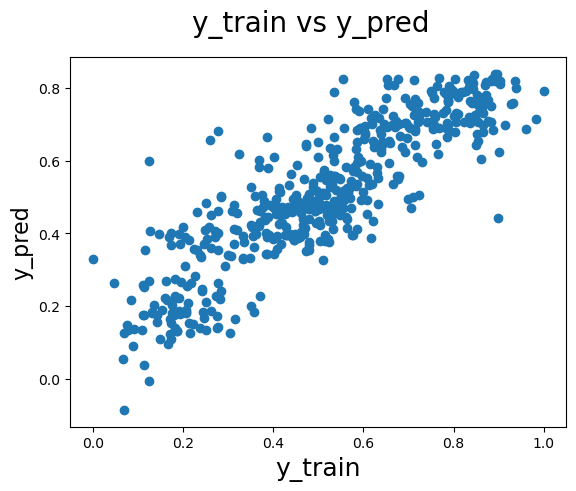

In [65]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_train, y_train_price)
fig.suptitle('y_train vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_train', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

Text(0, 0.5, 'y_pred')

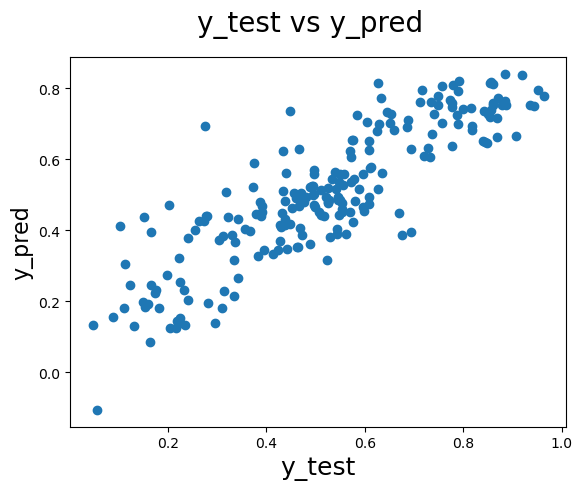

In [66]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m4)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [67]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_m4)

0.7420811945930987

In [68]:
lr_4.params

const           0.259109
yr              0.248308
holiday        -0.082845
weekday         0.049550
windspeed      -0.178046
season_2        0.255771
season_3        0.313733
season_4        0.228725
weathersit_2   -0.088869
weathersit_3   -0.293951
dtype: float64


We can see that the equation of our best fitted line is:

$ cnt = 0.248308  \times  yr - 0.082845  \times  holiday + 0.049550 \times weekday - 0.178046 \times windspeed + 0.255771 \times season_2 + 0.313733 \times season_3 + 0.228725 \times season_4 - 0.088869 \times weathersit_2 - 0.293951 \times weathersit_3 + 0.259109 $
